In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
palette_hc = ['#ffffff', '#ddaa33', '#bb5566', '#004488', '#000000']

import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

import seaborn as sns

from tqdm.auto import tqdm

import time
import os
from collections import OrderedDict
import json
import pickle

import gc

import sys
sys.path.append("../")

from src.helpers import calculate_RMSE_balanced, calculate_RMSE, Timer, autoscaling, \
                        calculate_composite_RMSE_V_CaT, update_array_from_kwargs, get_value_by_key

from src.postprocessing import collect_results, create_C_S

idx = pd.IndexSlice

# From cluster

In [136]:
cluster_name = "pikunov.av@calc.cod.phystech.edu"
folder_name_src = "/home/common/pikunov.av/pypoptim/results/voigt"
folder_name_dst = "../results/koivumaki/voigt"

folder_name_dst = os.path.abspath(folder_name_dst)

case_list = "G1/C1/210122_051129", "G2/C2/210122_082053", "G3/C1/210121_212326", "G4/C8/210122_001806"
#case_list = "G1/C1/210122_221831", "G2/C2/210123_122249", "G3/C1/210122_142150", "G4/C8/210123_031303"

case_list = "G1/C3/210126_181937", "G2/C4/210127_032432", "G3/C2/210127_141706"

case_list = "G1/C2/210203_181931", "G2/C2/210204_030703", 
case_list += 'G3/C5/210204_094751', 'G4/C3/210204_174434', 'G4/C4/210205_013028', 'G4/C2/210205_095852'

# kernik
folder_name_src = "/home/common/pikunov.av/pypoptim/results/kernik_clancy/syn"
folder_name_dst = "../results/kernik_clancy/syn"
case_list = "210206_175442", "210206_201628"

case_list = "210210_111426", "210211_064429",# "210209_223739", # "210208_185315",# "210208_142104", "210208_144953"#"210208_115045", "210208_111459", "210208_144953", 


# fluo
folder_name_src = "/home/common/pikunov.av/pypoptim/results/voigt/fluo/koivumaki"
folder_name_dst = "../results/voigt/fluo/koivumaki"

case_list = "G1/C2/210217_143655",
case_list = "G1/C3/210217_160358", 

case_list = "G1/C3/210217_214917", "G1/C2/210218_072123"

case_list = "G1/C3/210220_184406", "G1/C2/210221_032353", "G2/C2/210221_135226", "G3/C5/210222_010834", "G4/C3/210222_121848"

case_list = "G1/C3/210225_002135", "G1/C2/210225_091843", "G2/C2/210225_191126"

case_list = "G1/C3/210228_152951", "G1/C3/210301_044325"

case_list = "G1/C3/210302_121858",

item_list = ['dump_last.npy',
             #'dump.bin',
             'phenotype/*.csv',
             'config_backup.pickle']

text = ""

for case in case_list:
    
    folder_name = os.path.join(folder_name_dst, case)
    os.makedirs(folder_name, exist_ok=True)
    
    for item in item_list:
        src = os.path.join(folder_name_src, case, item)
        head, _ = os.path.split(item)
        if head:
            dst = os.path.join(folder_name_dst, case, head)
            os.makedirs(dst, exist_ok=True)
        else:
            dst = os.path.join(folder_name_dst, case)
            
        dst = os.path.abspath(dst)
            
        request = f"scp -r {cluster_name}:{src} {dst}\n"
        text += request
        
filename_script = "../misc/from_cluster.sh"
with open(filename_script, 'w') as f:
    f.write(text)

In [137]:
!bash ../misc/from_cluster.sh

dump_last.npy                                 100%  928KB   9.7MB/s   00:00    
phenotype_1032.csv                            100%  999KB   8.6MB/s   00:00    
phenotype_2064.csv                            100% 1998KB  13.6MB/s   00:00    
phenotype_258.csv                             100%  249KB   6.7MB/s   00:00    
phenotype_344.csv                             100%  331KB   6.7MB/s   00:00    
phenotype_516.csv                             100%  498KB   8.9MB/s   00:00    
config_backup.pickle                          100%   65KB   1.7MB/s   00:00    


# Data loading

In [452]:
case_list = 'G3/C1/201224_215531', 'G3/C1/201224_210103', 'G3/C1/201223_220723', 
#case_list = 'G4/C8/201223_232912',
#case_list = 'G2/C2/201224_125711',
#case_list = 'G1/C1/201225_092709',

case_list = 'G3/C1/201223_220723', 
case_list = 'G3/C1/210113_133246',
case_list = 'G3/C1/210114_012849',

case_list = 'G3/C1/210114_153411',
#case_list = 'G3/C1/210114_154059',
#case_list = 'G3/C1/210114_154032',

#case_list = 'G3/C1/210114_153411', 'G3/C1/210114_154059', 'G3/C1/210114_154032'

# ical_ghk
# case_list = "G1/C1/210115_115857", # 3D ok
# case_list = "G2/C2/210115_183711", # 3D ok
case_list = 'G3/C1/210114_153411', 'G3/C1/210115_113955',
case_list = "G4/C8/210116_070854",

# case_list = "G1/C1/210115_115857", "G2/C2/210115_183711", 'G3/C1/210114_153411', "G4/C8/210116_070854"

# ical_ghk_tor
# case_list = "G1/C1/210118_200016",
# case_list = "G2/C2/210119_054105",
# case_list = "G3/C1/210118_195415",
# case_list = "G4/C8/210120_003000",

# case_list = "G1/C1/210118_200016", "G2/C2/210119_054105", "G3/C1/210118_195415", "G4/C8/210120_003000"

#ical_ghk + ical_gh_tor
case_list = ["G1/C1/210118_200016", "G2/C2/210119_054105", "G3/C1/210118_195415", "G4/C8/210120_003000",
             "G1/C1/210115_115857", "G2/C2/210115_183711", 'G3/C1/210114_153411', 'G3/C1/210115_113955', "G4/C8/210116_070854",
             ]

case_list = "G3/C1/210121_202018", "G3/C1/210121_202452"

In [2]:
# rel
case_list = "G1/C1/210122_051129", "G2/C2/210122_082053", "G3/C1/210121_212326", "G4/C8/210122_001806"
case_list += "G1/C1/210122_221831", "G2/C2/210123_122249", "G3/C1/210122_142150", "G4/C8/210123_031303"
case_list += "G1/C3/210126_181937", "G2/C4/210127_032432", "G3/C2/210127_141706"

In [2]:
case_list = 'G3/C1/210121_212326', # Rheeda

In [79]:
case_list = 'G3/C1/210204_143557',

In [10]:
# koivumaki
case_list = "G1/C2/210203_181931", "G2/C2/210204_030703", 'G3/C5/210204_094751', 'G4/C3/210204_174434', 'G4/C4/210205_013028',# 'G4/C2/210205_095852'
case

In [68]:
# kernik_clancy
#case_list = ,
case_list = "210208_111459", "210208_115045", "210208_142104", "210208_144953", "210208_185315"


In [81]:
# fluo
case_list = "G2/C2/210225_191126",

In [3]:
output_list = []

dirname_results = "../results/maleckar/voigt"
# dirname_results = "../results/koivumaki/voigt"
# dirname_results = "../results/voigt"
# dirname_results = "../results/kernik_clancy/syn"
# dirname_results = "../results/voigt/fluo/koivumaki"


for case in tqdm(case_list):
    
    output_dict = collect_results(case, dirname_results, load_dump=False, voigt=True)
    #del output_dict['dump']
    gc.collect()
    output_list.append(output_dict)
    
    #break
    
#     dirname_report = os.path.join("../images/maleckar/reports/", case)
#     os.makedirs(dirname_report, exist_ok=True)

  0%|          | 0/1 [00:00<?, ?it/s]

phenotype:   0%|          | 0/5 [00:00<?, ?it/s]

In [158]:
columns_tuples = []

for output in output_list:
    tag, genes = output['trio'], output['genes']
    for exp_cond in genes:
        for gene in genes[exp_cond]:
            t = (exp_cond, gene)
            if t not in columns_tuples:
                columns_tuples.append(t)
                
columns_tuples = [('common', 'fitness')] + columns_tuples
                
m_index = pd.MultiIndex.from_tuples(columns_tuples)

index_tuples = [x['trio'] for x in output_list]
m_index_index = pd.MultiIndex.from_tuples(index_tuples)

df_sol = pd.DataFrame([[None for item in columns_tuples]] * len(output_list),
                      columns=m_index, index=m_index_index)

for i, output in enumerate(output_list):
    trio, genes, values = output['trio'], output['genes'], output['dump_last'].iloc[0]
    columns_i = [(item[0], key) for item in genes.items() for key in item[1]]
    columns_i = [('common', 'fitness')] + columns_i
    for j, c in enumerate(columns_i):
        df_sol.loc[trio, c] = values[j]
        
df_sol.index.names = ['Group', 'Cell', 'Case']
df_sol = df_sol.T.sort_index(axis='columns')

if ('common', 'fluo_tot') in df_sol.index.to_list():
    df_sol.loc[('common', 'fluo_tot_uM'), :] = None
    df_sol.loc[('common', 'fluo_tot_uM'), :] = df_sol.loc[('common', 'fluo_tot')]
    df_sol.loc[('common', 'fluo_tot_uM')].fillna(1, inplace=True)
    df_sol.loc[('common', 'fluo_tot_uM')] *= 10  # uM

# df_sol = df_sol.sort_index()

df_sol

Group                        3
Cell                         1
Case             210121_212326
common fitness       -5.778809
       P_Na           0.800053
       g_Ca_L         0.050550
       pca_tor        0.051738
       g_t            0.873471
       g_kur          0.125975
       g_K1           0.361096
       g_Kr           3.350912
       g_Ks           0.881150
       g_B_Na         0.358755
       g_B_Ca         0.214031
       i_NaK_max      0.286457
       i_CaP_max      0.253126
       K_NaCa         0.275387
       alpha_rel      0.114886
       I_up_max       9.079003
       tau_tr         0.115617
2064   Na_i           8.549933
       K_i          124.332483
       Ca_rel         0.435834
1032   Na_i          10.038207
       K_i          122.271829
       Ca_rel         0.707104
516    Na_i          13.154887
       K_i          123.605435
       Ca_rel         1.722031
344    Na_i          15.938652
       K_i          131.316021
       Ca_rel         3.604064

In [18]:
# df_sol.to_csv("../misc/table.csv")

In [7]:
0.051738 * 5e-5 * 50

0.000129345

In [9]:
#df_sol.to_csv("../misc/syn/sol.csv")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

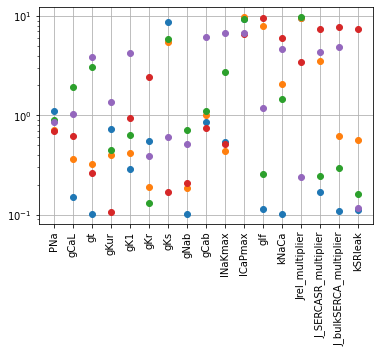

In [10]:
fig, ax = plt.subplots()

df = df_sol.loc['common'][1:]

plt.plot(df, 'o')

plt.yscale('log')

plt.grid()

plt.xticks(rotation=90)

In [21]:
#df_sol.to_csv("../misc/kc_solutions.csv")

In [22]:
# fig, ax = plt.subplots(figsize=(4, 2))

# sns.swarmplot(x=np.log10(df_sol.loc[('common', 'tau_tr')].values.astype(float)), ax=ax)

# plt.grid()

# plt.title('tau_tr, log10')

# plt.tight_layout()

#plt.savefig("../images/maleckar/tau_tr.png", dpi=300, facecolor='white')

In [23]:
#df_sol.to_csv("../../../projects/rheeda/tau_tr_coeffs.csv")

In [7]:
df_states = []

for output in output_list:
    phenotype_model_last = output['phenotype_model_last']
    x = pd.concat({key : value.iloc[0] for key, value in phenotype_model_last.items()}, axis=1)
    m_index = pd.MultiIndex.from_tuples((output['trio'] + (int(CL),) for CL in phenotype_model_last.keys()))
    m_index.names = 'Group', 'Cell', 'Case', 'CL'
    x = pd.DataFrame(x.values, index=x.index, columns=m_index)
    df_states.append(x)
    
df_states = pd.concat(df_states, axis=1).sort_index(axis='columns')

df_states

Group                 1                                                  \
Cell                  3                                                   
Case      210228_152951                                                   
CL                 258         344         516         1032        2064   
CaSR1          1.037773    0.922840    0.682681    0.401424    0.279847   
CaSR2          1.038337    0.923379    0.683133    0.401774    0.280048   
CaSR3          1.039062    0.924068    0.683690    0.402153    0.280228   
CaSR4          1.038677    0.923697    0.683359    0.401797    0.279936   
Cai1           0.000147    0.000131    0.000098    0.000058    0.000041   
Cai2           0.000148    0.000131    0.000098    0.000059    0.000042   
Cai3           0.000148    0.000132    0.000098    0.000059    0.000042   
Cai4           0.000150    0.000134    0.000100    0.000061    0.000043   
Cass           0.000149    0.000132    0.000098    0.000059    0.000041   
d              0.000118    0.000087    0.000077    0.000058    0.000033   
f1             0.985470    0.992844    0.994138    0.995425    0.997080   
f2             0.650104    0.831121    0.949039    0.995139    0.997101   
fca            0.978273    0.982832    0.990504    0.996555    0.998289   
y              0.007899    0.010283    0.015396    0.031071    0.062831   
pa             0.006694    0.001038    0.000297    0.000217    0.000127   
n              0.022517    0.020606    0.015151    0.006288    0.001826   
ikur_r         0.001616    0.001299    0.001188    0.000976    0.000674   
ikur_s         0.893759    0.909095    0.933003    0.965514    0.984874   
h1             0.353883    0.466252    0.512277    0.593902    0.727837   
h2             0.204133    0.347466    0.468569    0.594264    0.731334   
m              0.014889    0.012159    0.011162    0.009133    0.006213   
it_r           0.003396    0.002908    0.002724    0.002342    0.001754   
it_s           0.840614    0.874430    0.884066    0.898779    0.921393   
V            -61.537462  -63.222821  -63.934417  -65.597979  -68.784599   
Ki           104.634951  100.487070  100.640347  117.305687  155.865649   
ryr_a1         0.141611    0.131687    0.115211    0.101848    0.097627   
ryr_a2         0.141751    0.131808    0.115298    0.101920    0.097681   
ryr_a3         0.142187    0.132181    0.115557    0.102113    0.097813   
ryr_ass        0.144611    0.134181    0.116764    0.102765    0.098051   
c1             0.805284    0.885148    0.977265    0.998263    0.999510   
c2             0.804317    0.884308    0.977004    0.998231    0.999501   
c3             0.801303    0.881697    0.976218    0.998144    0.999481   
css            0.821612    0.898058    0.979559    0.998326    0.999531   
o1             0.000792    0.000644    0.000363    0.000153    0.000100   
o2             0.000794    0.000646    0.000365    0.000154    0.000101   
o3             0.000799    0.000651    0.000369    0.000156    0.000102   
oss            0.000758    0.000612    0.000349    0.000151    0.000099   
serca_a1       0.010180    0.008514    0.005184    0.001995    0.001018   
serca_a2       0.010196    0.008530    0.005198    0.002006    0.001025   
serca_a3       0.010239    0.008572    0.005234    0.002035    0.001041   
serca_ass      0.010352    0.008637    0.005245    0.002028    0.001020   
Nai            6.855125    6.650553    6.088585    5.283819    5.251395   
Nass           6.675058    6.654450    6.109374    5.234169    5.027054   
fluo_1         0.014015    0.012711    0.009831    0.006162    0.004472   
fluo_2         0.014031    0.012728    0.009849    0.006187    0.004495   
fluo_3         0.014080    0.012779    0.009902    0.006252    0.004547   
fluo_4         0.014249    0.012944    0.010050    0.006388    0.004616   
fluo_ss        0.014148    0.012789    0.009861    0.006210    0.004469   

Group                                                                    
Cell                     

In [25]:
#df_states.to_csv("../misc/kc_states.csv")

In [15]:
# with open("/home/andrey/WORK/HPL/Code/pypoptim/results/voigt/G1/C3/210204_195958/organism_best.pickle", 'br') as f:
#     org = pickle.load(f)

# Analisys

In [24]:
dump = output_list[0]['dump']
loss = -dump.loc[idx[:, 0], :].iloc[:, 0]

In [25]:
from sklearn.metrics import pairwise_distances

In [27]:
m_list = []

for i in tqdm(range(0, len(loss), 10)):

    df = dump['common'].iloc[:, 1:].loc[i]
    m = pairwise_distances(df, n_jobs=-1)
    m_list.append(m.mean())

  0%|          | 0/6 [00:00<?, ?it/s]

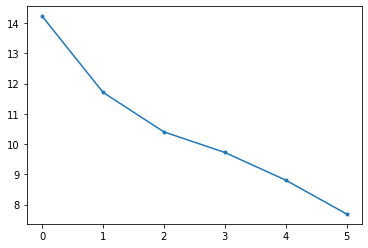

In [28]:
plt.plot(m_list, '.-')

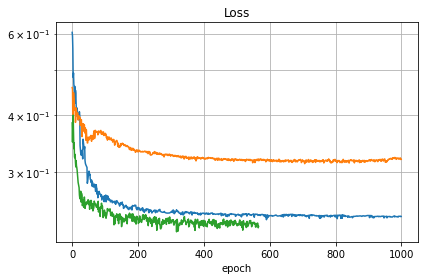

In [14]:
for i in range(len(output_list)):

    dump = output_list[i]['dump']
    loss = -dump.loc[idx[:, 0], :].iloc[:, 0]

    plt.semilogy(loss.values,
                 #color=palette_hc[-2],
                )
    
plt.grid(True, which='both')
plt.title('Loss')
plt.xlabel('epoch')
plt.tight_layout()

# dirname = os.path.join("../images/maleckar/reports/", case,)
# os.makedirs(dirname, exist_ok=True)     

# plt.savefig(os.path.join(dirname, "loss.png"), dpi=600)

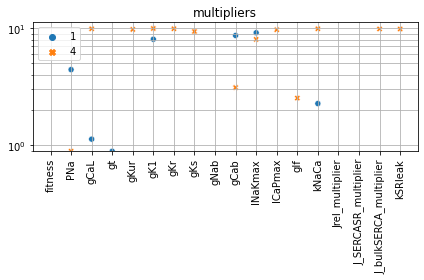

In [23]:
sns.scatterplot(data=df_sol.loc['common'])
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.yscale('log')
plt.grid(which='both')
plt.title('multipliers')

plt.tight_layout()

#plt.savefig("./images/koivumaki/reports/Fri_Dec_4_mults.png", dpi=300)

KeyError: 'Na_i'

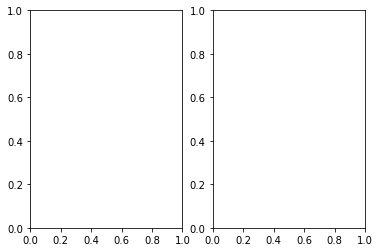

In [51]:
fig, axes = plt.subplots(ncols=2)

for i, item in enumerate(['Na_i', 'K_i']):
    plt.sca(axes[i])
    df = df_sol.loc[idx[:, item]].T.unstack().copy()
    df.index = df.index.astype('str')
    sns.scatterplot(data=df)
    plt.setp(plt.gca().get_xticklabels(), rotation=90)
    plt.grid()
    plt.title(item)
    plt.xlabel('CL')
    
plt.tight_layout()

#plt.savefig("./images/koivumaki/reports/Fri_Dec_4_params.png", dpi=300)

In [10]:
phenotype_model = {}
phenotype_model_last = {}
gc.collect()


for exp_cond_name in tqdm(config['experimental_conditions']):
    
    if exp_cond_name == 'common':
        continue
    
    if True:
        index_col = ['epoch', 'index']
        usecols = index_col + ['V',
                               #'Cai1', 'Cai2', 'Cai3', 'Cai4', 'Cass',
                               #'Nai', 'Ki',
                               'Na_i', 'K_i',
                               ] 

        filename = os.path.join(config_path, "phenotype", f"phenotype_{exp_cond_name}.csv")
        if os.path.isfile(filename):
            try:
                phenotype_model_last[exp_cond_name] = pd.read_csv(filename,
                                                                  #usecols=usecols
                                                                 )
                phen_len = len(phenotype_model_last[exp_cond_name])
            except pd.errors.EmptyDataError as e:
                print(f'{filename} is empty')
                continue

    
            if False:
                filename = os.path.join(config_path, "phenotype", f"phenotype_{exp_cond_name}.bin")    
                phenotype_model[exp_cond_name] = np.fromfile(filename, dtype=np.float32).reshape(-1, len(config['runtime']['states_initial']))

                n_epochs = len(phenotype_model[exp_cond_name]) // phen_len

                m_index_tuples = [(epoch, index) for epoch in range(n_epochs) for index in range(phen_len)]
                m_index = pd.MultiIndex.from_tuples(m_index_tuples)

                phenotype_model[exp_cond_name] = pd.DataFrame(phenotype_model[exp_cond_name],
                                                              index=m_index,
                                                              columns=phenotype_model_last[exp_cond_name].columns)

  0%|          | 0/5 [00:00<?, ?it/s]

In [24]:
#dump.columns.levels

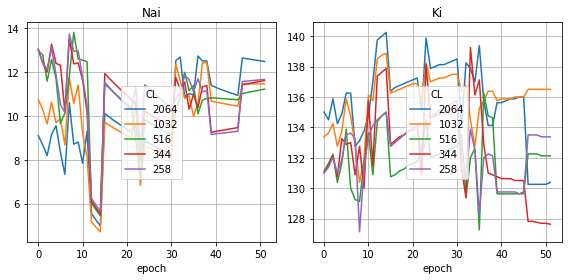

In [30]:
items = ['Nai', 'Ki']
#items = ['Na_i', 'K_i']


nrows = 1
ncols = len(items)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=plt.figaspect(nrows / ncols),
                         #sharex='col', sharey='row',
                        )

for i, item in enumerate(items):
    plt.sca(axes[i])
    for column in dump:
        if item not in column:
            continue
        #max_epoch = dump.index[-1][0]
        #x_space = np.linspace(0, max_epoch, len(dump))
        plt.plot(dump.loc[idx[:, 0], column].values, label=column[0])
    plt.legend(title='CL', loc='center')
    plt.xlabel('epoch')
    plt.grid()
    plt.title(item)

# dirname = os.path.join("../images/maleckar/reports/", case,)
# os.makedirs(dirname, exist_ok=True)                

plt.tight_layout()
#plt.savefig(os.path.join(dirname, "concentrations.png"), dpi=600)

In [37]:
[(i, output['trio']) for i, output in enumerate(output_list)]

[(0, (1, 2, '210217_143655'))]

CL = 2064, rmse_V = 1.644e+00
CL = 1032, rmse_V = 1.248e+00
CL = 516, rmse_V = 1.478e+00


IndexError: index 3 is out of bounds for axis 0 with size 3

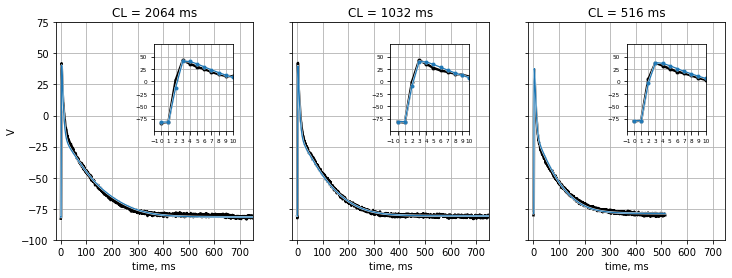

In [159]:
for i_output in range(len(output_list)):

    nrows = 1
    ncols = 3 #5 # len(exp_cond_dict)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows / ncols),
                             sharex='col', sharey='row')

    config = output_list[i_output]['config']
    phenotype_model_last = output_list[i_output]['phenotype_model_last']

    exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']

    item = 'V'

    for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):

        ax = axes[i_cond]
        ax_inset = ax.inset_axes([0.5, 0.5, 0.4, 0.4])

        exp = exp_cond['phenotype']['V']
        model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]

        exp, model = map(lambda x: np.roll(x, 1), [exp, model])

        rmse = calculate_RMSE(exp, model)

        ax.set_yticks(np.arange(-100, 75 + 1, 25))
        ax.set_ylim(-100, 75)

        print(f"CL = {exp_cond_name}, rmse_{item} = {rmse:.3e}")

        if i_cond == 0:
            ax.set_ylabel(item)

        for ml, ax_ in zip(['-', '.-'], [ax, ax_inset]):

            ax_.plot(exp, ml, color='w', lw=3)
            ax_.plot(exp, ml,
                     color='k', #color=palette_hc[3],
                     lw=2.5, label='exp')

            ax_.plot(model, ml, color='w', lw=2)
            ax_.plot(model, ml,
                     color=f"C{i_output}", #palette_hc[2],
                     lw=1.25, label='model')

        ax.set_title(f'CL = {exp_cond_name} ms')
        ax.set_xlabel('time, ms')

        xlim_right = 750
        ax.set_xticks(np.arange(0, xlim_right+1, 100))
        ax.set_xlim(-20, xlim_right)

        xlim_right_inset = 10
        ax_inset.set_xlim(-1, xlim_right_inset)
        ax_inset.set_ylim(ax.get_ylim())
        ax_inset.set_yticks(ax.get_yticks()[1:-1])
        ax_inset.set_xticks(np.arange(-1, xlim_right_inset+1, 1))
        ax_inset.tick_params(axis='both', labelsize='xx-small')

        for ax_ in ax, ax_inset:
            ax_.grid(True)

    fig.align_labels()
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

    fig.suptitle(config['runtime']['output_folder_name'])

    # dirname = os.path.join("../images/maleckar/reports/", case,)
    # os.makedirs(dirname, exist_ok=True)               
    dirname = "../misc/syn/"
    #plt.savefig(os.path.join(dirname, f"waveforms_101_beats.png"), dpi=600, facecolor='white')

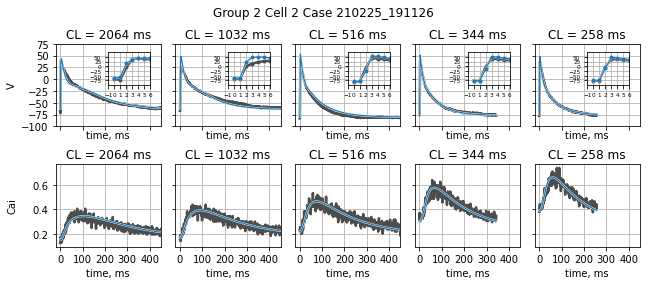

In [83]:
for i_output, output in enumerate(output_list):
    
    config = output['config']
    exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']
    phenotype_model_last = output['phenotype_model_last']

    nrows = 2
    ncols = len(phenotype_model_last)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows * 1.1 / ncols),
                             sharex='col', sharey='row')


    for i_item, item in enumerate(['V', 'Cai']):

        for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):
            
            if phenotype_model_last[exp_cond_name] is None or len(phenotype_model_last[exp_cond_name]) == 0:
                continue

            ax = axes[i_item, i_cond]

            ax.set_title(f'CL = {exp_cond_name} ms')
            ax.set_xlabel('time, ms')

            xlim_right = 450
            ax.set_xticks(np.arange(0, xlim_right+1, 100))
            ax.set_xlim(-20, xlim_right)

            ax.grid(True)

            exp = exp_cond['phenotype'][item]

            if item == 'Cai':

                ax_inset = None

                legend = config['runtime']['legend'] 
                volumes = legend['constants'][['Vss'] + [f'Vnonjunct{i}' for i in range(1, 4 + 1)]]
                concentrations = phenotype_model_last[exp_cond_name][['Cass'] + [f'Cai{i}' for i in range(1, 4 + 1)]]
                #concentrations = phenotype_model_last[exp_cond_name][['fluo_ss'] + [f'fluo_{i}' for i in range(1, 4 + 1)]]

                Cai_mean = (concentrations.values * volumes.values).sum(axis=1) / sum(volumes)
                Cai_mean = Cai_mean[:len(exp)]

                model = Cai_mean * 1000
                
                ca_exp_scaled, rmse_ca, coeffs = autoscaling(signal_to_scale=exp,
                                                             signal_reference=model)
                exp = exp * 1000
                exp = ca_exp_scaled
                
                #if i_output == 0:
                #    exp = exp / 864 * 740

    #             ax.set_yticks(np.arange(0, 0.0011, 0.00025))
    #             ax.set_ylim(0, 0.001)

            else:

                ax.set_yticks(np.arange(-100, 75 + 1, 25))
                ax.set_ylim(-100, 75)

                ax_inset = ax.inset_axes([0.5, 0.5, 0.4, 0.4])

                ax_inset.set_xlim(-1, 6)
                ax_inset.set_ylim(ax.get_ylim())
                ax_inset.set_yticks(ax.get_yticks()[1:-1])
                ax_inset.set_xticks(np.arange(-1, 6+1, 1))
                ax_inset.tick_params(axis='both', labelsize='xx-small')

                ax_inset.grid(True)

                model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]

            exp, model = map(lambda x: np.roll(x, 1), [exp, model])

    #         rmse = calculate_RMSE(exp, model)
    #         print(f"CL = {exp_cond_name}, rmse_{item} = {rmse:.3e}")

            if i_cond == 0:
                ax.set_ylabel(item)

            for ml, ax_ in zip(['-', '.-'], [ax, ax_inset]):

                if ax_ is None:
                    continue

                ax_.plot(exp, ml, color='w', lw=3)
                ax_.plot(exp, ml, color='0.3', lw=2.5, label='exp')

                ax_.plot(model, ml, color='w', lw=2)
                ax_.plot(model, ml,
                         color=f'C{i_output}', #color='C3',
                         lw=1.25, label='model')

    fig.align_labels()
    plt.tight_layout()

    plt.subplots_adjust(top=0.85)
    fig.suptitle('Group {} Cell {} Case {}'.format(*output['trio']))

    # dirname = os.path.join("../images/maleckar/reports/", case,)
    # os.makedirs(dirname, exist_ok=True) 

    filename_save = "../images/voigt/" + '_'.join(map(str, output['trio'])) + '.png'

    #plt.savefig(filename_save, dpi=600, facecolor='white')

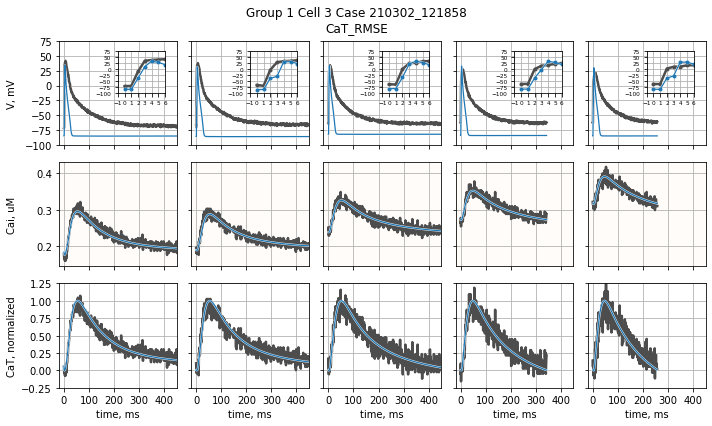

In [145]:
for i_output, output in enumerate(output_list):
    
    config = output['config']
    exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']
    phenotype_model_last = output['phenotype_model_last']

    nrows = 3
    ncols = len(phenotype_model_last)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(ncols * 2, nrows * 2), #plt.figaspect(nrows * 1.1 / ncols),
                             sharex='col', sharey='row')
    
    yticks = [np.arange(-100, 75 + 1, 25),
              None,
              np.arange(-0.25, 1.26, 0.25)]
    
    ylabels = ['V, mV', 'Cai, uM', 'CaT, normalized']
    
    xlim_right = 450
    xlim_right_inset = 6
    
    for i_row in range(nrows):
        
        for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):
            
            if phenotype_model_last[exp_cond_name] is None or len(phenotype_model_last[exp_cond_name]) == 0:
                continue
                
            ax = axes[i_row, i_cond]
            
            color = (1, 0.99, 0.98) #'xkcd:pale gray'  # 'xkcd:off white'
            if config['loss'].startswith('composite_RMSE_V_CaT') and i_row == 2:
                ax.set_facecolor(color)
            elif not config['loss'].startswith('composite_RMSE_V_CaT') and i_row == 1:
                ax.set_facecolor(color)
                
            if ax.is_first_col():
                ax.set_ylabel(ylabels[i_row])
                
            if ax.is_last_row():
                ax.set_xlabel('time, ms')
            
            ax.set_xticks(np.arange(0, xlim_right+1, 100))
            ax.set_xlim(-20, xlim_right)

            item_model = 'Cai_mean' if i_row else 'V'
            item_exp   = 'Cai'      if i_row else 'V'
            
            exp = exp_cond['phenotype'][item_exp].copy()
            model = phenotype_model_last[exp_cond_name].copy()
            
            legend = config['runtime']['legend'] 
            volumes = legend['constants'][['Vss'] + [f'Vnonjunct{i}' for i in range(1, 4 + 1)]]
            concentrations = phenotype_model_last[exp_cond_name][['Cass'] + [f'Cai{i}' for i in range(1, 4 + 1)]]
            model['Cai_mean'] = (concentrations.values * volumes.values).sum(axis=1) / sum(volumes)
            
            if i_row == 0:  # V
                
                model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]

                ax_inset = ax.inset_axes([0.5, 0.5, 0.4, 0.4])
                
                ax_inset.set_xticks(np.arange(-1, xlim_right_inset+1, 1))
                ax_inset.set_xlim(-1, xlim_right_inset)
                ax_inset.tick_params(axis='both', labelsize='xx-small')
                            
            else:
                ax_inset = None
                model = model['Cai_mean'].values[:len(exp)] * 1000
                exp   = exp * 1000

                if i_row == 1:  # Cai abs
                    exp = exp / 864 * 740
                    # pass

                if i_row == 2:  # Cai rel
                    model = (model - model.min()) / model.ptp()
                    ca_exp_scaled, rmse_ca_rel, coeffs = autoscaling(signal_to_scale=exp,
                                                                     signal_reference=model[:len(exp)])
                    exp = ca_exp_scaled
                    
            exp, model = map(lambda x: np.roll(x, 1), [exp, model])
            
            for ml, ax_ in zip(['-', '.-'], [ax, ax_inset]):
                if ax_:
                    
                    ax_.plot(exp, ml, color='w', lw=3)
                    ax_.plot(exp, ml, color='0.3', lw=2.5, label='exp')

                    ax_.plot(model, ml, color='w', lw=2)
                    ax_.plot(model, ml,
                             color=f'C{i_output}', #color='C3',
                             lw=1.25, label='model')
                    
                    ax_.grid(True)
                    
                    if yticks[i_row] is not None:
                        ax_.set_yticks(yticks[i_row])
                        ax_.set_ylim(yticks[i_row][[0, -1]])    

    fig.align_labels()
    plt.tight_layout()

    plt.subplots_adjust(top=0.9)
    suptitle = 'Group {} Cell {} Case {}'.format(*output['trio'])
    suptitle += '\n' + config['loss']
    fig.suptitle(suptitle)

    # dirname = os.path.join("../images/maleckar/reports/", case,)
    # os.makedirs(dirname, exist_ok=True) 
    # filename_save = "../images/voigt/" + '_'.join(map(str, output['trio'])) + '.png'
    #plt.savefig(filename_save, dpi=600, facecolor='white')

In [12]:
output_list[0]['config']['experimental_conditions']['common']

{'params': {'STIM_LEVEL': 1.5,
  'Na_o': 140,
  'Ca_o': 2.0,
  'K_o': 4,
  'PNa': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gCaL': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gt': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gKur': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gK1': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gKr': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gKs': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gNab': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gCab': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'INaKmax': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'ICaPmax': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gIf': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'kNaCa': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier'

In [13]:
output_list[1]['config']['experimental_conditions']['common']

{'params': {'STIM_LEVEL': 1.5,
  'Na_o': 140,
  'Ca_o': 2.0,
  'K_o': 4,
  'PNa': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gCaL': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gt': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gKur': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gK1': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gKr': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gKs': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gNab': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gCab': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'INaKmax': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'ICaPmax': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'gIf': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier': True},
  'kNaCa': {'bounds': [0.1, 10], 'gamma': 0.015, 'is_multiplier'

In [23]:
concentrations = phenotype_model_last[exp_cond_name][['fluo_ss'] + [f'fluo_{i}' for i in range(1, 4 + 1)]]

fluo_mean = (concentrations.values * volumes.values).sum(axis=1) / sum(volumes)
fluo_mean = fluo_mean[:len(Cai_mean)]

In [7]:
plt.plot(fluo_mean)

NameError: name 'fluo_mean' is not defined

In [25]:
def Ca(F, F_max=0.01, F_min=0, Kd=0.74e-3): # Kd=0.74e-3
    return Kd * (F - F_min) / (F_max - F)

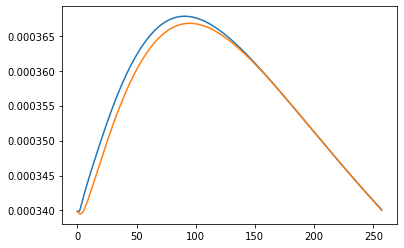

In [26]:
plt.plot(Cai_mean)
plt.plot(Ca(fluo_mean))

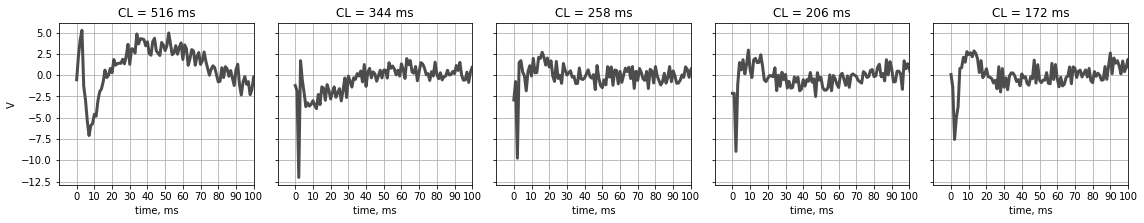

In [18]:
exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']


nrows = 1
ncols = len(exp_cond_dict)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=plt.figaspect(nrows / ncols),
                         sharex='col', sharey='row')

item = 'V'

for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):

    ax = axes[i_cond]

    exp = exp_cond['phenotype']['V']
    model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]
    
    exp, model = map(lambda x: np.roll(x, 1), [exp, model])

#     ax.set_yticks(np.arange(-100, 75 + 1, 25))
#     ax.set_ylim(-100, 75)

    if i_cond == 0:
        ax.set_ylabel(item)

    ax.plot(exp - model, '-', color='0.3', lw=3)

    ax.grid()

    ax.set_title(f'CL = {exp_cond_name} ms')
    ax.set_xlabel('time, ms')
    
    ax.set_xlim(-10, 100)
    ax.set_xticks(np.arange(0, 100+1, 10))


              
dirname = os.path.join("../images/maleckar/reports/", case,)
os.makedirs(dirname, exist_ok=True)                

fig.align_labels()
plt.tight_layout()
#plt.savefig(os.path.join(dirname, "waveforms_diff.png"), dpi=600, facecolor='white')

In [18]:
import pyCardiac as pc

In [19]:
exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']

m_index = pd.MultiIndex.from_product([[x[0] for x in exp_cond_dict],
                                      ['exp', 'model']], names=['CL', None])

df = pd.DataFrame(index=m_index, columns=['RP', 'APA', 'dVdt_max', 'APD80'])

for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):

    exp = exp_cond['phenotype']['V'].values
    model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]
    
    df.loc[idx[exp_cond_name, :], 'RP'] = exp[-1], model[-1]
    df.loc[idx[exp_cond_name, :], 'APA'] = np.ptp(exp), np.ptp(model)
    df.loc[idx[exp_cond_name, :], 'dVdt_max'] = np.max(np.diff(exp)), np.max(np.diff(model))
    
    t = np.arange(len(exp))
    df.loc[idx[exp_cond_name, :], 'APD80'] = [pc.signal.analysis.calculate_APD(t, exp),
                                              pc.signal.analysis.calculate_APD(t, model)]

NameError: name 'config' is not defined

In [21]:
df

RP         APA   dVdt_max APD80
CL                                               
516 exp   -83.007812  129.394531  70.190430    97
    model -82.470832  124.368473  68.238244   103
344 exp   -76.293945  117.492676  72.021484    94
    model -75.076019  114.110646  82.212481    89
258 exp   -77.819824  115.356445  72.021484    88
    model -74.913128  110.763646  81.028040    83
206 exp   -73.852539  107.421875  75.378418    83
    model -71.721185  103.326965  82.202803    78
172 exp   -69.885254   97.961426  74.157715    76
    model -69.967803   97.598365  80.274809    74

In [136]:
df_sol

Group                          NaN
Cell                           NaN
Case                 210206_175442
common fitness           -5.123744
       g_K1_scaler        2.106238
       g_Kr_scaler        0.980877
       g_Ks_scaler        5.859887
       g_to_scaler        1.768632
       g_CaL_scaler       2.587510
       g_CaT_scaler       0.165587
       g_Na_scaler        1.357426
       g_f_scaler         0.737524
       kNaCa_scaler       1.550181
       VmaxUp_scaler      0.531815
       ks_scaler          0.114171
       V_leak_scaler      0.534613
       PNaK_scaler        1.294413
       g_b_Na_scaler      4.802012
       g_b_Ca_scaler      0.106124
       g_PCa_scaler       1.861080
900    Nai                9.264168
       Ki               100.388720
       Ca_SR              0.520447
800    Nai                9.616125
       Ki               100.233236
       Ca_SR              0.522977
700    Nai                9.778787
       Ki               100.175920
       Ca_SR              0.527924
600    Nai               10.042443
       Ki               100.278199
       Ca_SR              0.532896
500    Nai               10.234786
       Ki               100.418480
       Ca_SR              0.538578

In [138]:
%matplotlib inline

  0%|          | 0/487 [00:00<?, ?it/s]

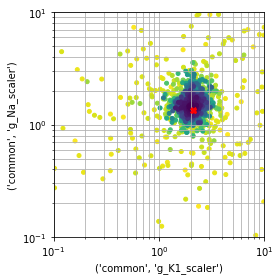

In [139]:
plt.figure(figsize=plt.figaspect(1))

name_x, name_y = ('common', 'g_K1_scaler'), ('common', 'g_Na_scaler')
#name_x, name_y = ('1032', 'K_i'), ('1032', 'Na_i')

epoch = 0

df = dump.loc[epoch][::-1]
#c = np.arange(len(df)) # np.log(-df['common', 'fitness'])

scat = plt.scatter(df[name_x], df[name_y], c=df.index, s=16)
line_best, = plt.plot(df[name_x].loc[0],
                      df[name_y].loc[0], 'Xr')

if genes[name_x[0]][name_x[1]].get('is_multiplier', False):
    plt.xscale('log')
if genes[name_y[0]][name_y[1]].get('is_multiplier', False):
    plt.yscale('log')

plt.xlabel(name_x)
plt.ylabel(name_y)

plt.xlim(genes[name_x[0]][name_x[1]]['bounds'])
plt.ylim(genes[name_y[0]][name_y[1]]['bounds'])

plt.grid(which='both')
plt.tight_layout()
#plt.gcf().align_labels()

dirname = os.path.join("../images/kernik/syn/", case, 'pairplots', "_".join(name_x + name_y))
os.makedirs(dirname, exist_ok=True)

for epoch in tqdm(range(0, dump.index[-1][0])):
    df = dump.loc[epoch][::-1]
    #c = np.arange(len(df)) # np.log(-df['common', 'fitness'])
    scat.set_offsets(df[[name_x, name_y]])
    scat.set_array(df.index)
    line_best.set_data(df[name_x].loc[0], df[name_y].loc[0])
    plt.savefig(os.path.join(os.path.join(dirname, f"pairplot_{epoch:04d}.png")), dpi=200)

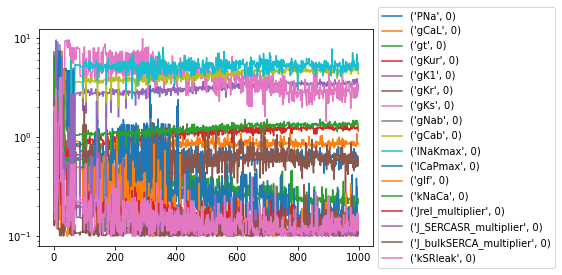

In [20]:
df = dump.loc[idx[:, 0], 'common'].unstack().iloc[:, 1:]

for key in df:
    plt.semilogy(df[key], label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Prepare baselines

In [4]:
import numpy as np
import pandas as pd
import ctypes
import matplotlib.pyplot as plt

import time
import os

import sys
sys.path.append("../")

from src.helpers import update_array_from_kwargs, get_value_by_key

dirname = '../src/model_ctypes/_maleckar_ical_ghk_tor/'
filename_so = os.path.join(dirname, 'maleckar.so')

# dirname = '../src/model_ctypes/_koivumaki/'
# filename_so = os.path.join(dirname, 'koivumaki.so')

# dirname = '../src/model_ctypes/_kernik_clancy/'
# filename_so = os.path.join(dirname, 'model.so')

filename_so_abs = os.path.abspath(filename_so)

model = ctypes.CDLL(filename_so_abs)

model.initialize_states_default.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]

model.initialize_states_default.restype = ctypes.c_void_p


# model.initialize_constants_default.argtypes = [
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]

# model.initialize_constants_default.restype = ctypes.c_void_p


model.computeRates.argtypes = [
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]
model.computeRates.restype = ctypes.c_void_p


# model.computeVariables.argtypes = [
#     ctypes.c_double,
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]
# model.computeVariables.restype = ctypes.c_void_p


model.run.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_int,
    ctypes.c_double,
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS')#,
    #np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS'),
    #np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]

model.run.restype = ctypes.c_int



# model.run_chain.argtypes = [
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     ctypes.c_int,
#     ctypes.c_double,
#     ctypes.c_double,
#     ctypes.c_int,
#     ctypes.c_double,
#     ctypes.c_double,
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS'),
# ]

# model.run_chain.restype = ctypes.c_int


# legend_algebraic = pd.read_csv(os.path.join(dirname, "legend_algebraic.csv"), index_col='name')
# legend_algebraic = legend_algebraic.iloc[:, :0]
# legend_algebraic['value'] = 0.0

legend_constants = pd.read_csv(os.path.join(dirname, "legend_constants.csv"), index_col='name')['value']
legend_states = pd.read_csv(os.path.join(dirname, "legend_states.csv"), index_col='name')['value']

In [15]:
# S = np.zeros(len(legend_states)) #  np.loadtxt("S.txt")
# C = legend_constants.values #  np.loadtxt("C.txt")

model.initialize_states_default(legend_states.values, legend_constants.values)

4621082499826719547

In [16]:
# S = np.zeros(len(legend_states)) #  np.loadtxt("S.txt")
# C = np.zeros(len(legend_constants)) #  np.loadtxt("C.txt")

# model.initialize_states_default(S)
# model.initialize_constants_default(C)

In [17]:
# S = legend_states.copy()
# C = legend_constants.copy()

# A = legend_algebraic.copy()
# R = np.zeros(len(legend_states))

In [43]:
output = output_list[0]

genes = output['dump_last'].iloc[0, 1:]
phenotype_model_last = output['phenotype_model_last']
config = output['config']

state = pd.DataFrame({exp_cond_name: phenotype_model_last[exp_cond_name].iloc[-1]
                      for exp_cond_name in config['experimental_conditions'] if exp_cond_name != 'common'})

C, S = create_C_S(dict(genes=genes, state=state), config, '1032')

stim_amplitude -60
stim_duration 0.001
Mg_i 1.0
Na_b 140
Ca_b 2.0
K_b 4
stim_period 1.032


In [33]:
C['g_K1'] *= 100

KeyError: 'g_K1'

In [50]:
C['g_K1'] *= 0.5
C['P_Na'] *= 0.6
C['g_Ca_L'] *= 0.5
#P_Ca_L_ToR_ORd*0.5

In [197]:
# C['stim_amplitude'] *= 2
# C['stim_amplitude']

In [3]:
S = legend_states.copy()
C = legend_constants.copy()

In [53]:
C['stim_amplitude'] = -180

In [98]:
C['stim_period'] = 1
C['stim_duration'] = 0.001
C['stim_amplitude'] = -60
#C['pca_tor'] = 0 # 5e-5 * 4
#C['g_Ca_L'] = 3 * 6.75

In [143]:
C['pca_tor'] = 5e-5 * 4


In [198]:
C['stim_period'] = 1

In [184]:
#C.to_csv("../../../projects/Rheeda/G3C1/andrey_constants.csv")

In [40]:
C['fluo_k_on'] = 0
C['fluo_k_off'] = 0

In [6]:
t_sampling = 0.001
# t_sampling = 1

#stim_period = C['STIM_PERIOD']
stim_period = C[config['stim_period_legend_name']] # C[config['stim_period_legend_name']]
#stim_period = get_value_by_key(C, legend_constants, 'stim_period')
n_samples_per_stim = int(stim_period / t_sampling)

n_beats = 100
tol = 1e-6

chain_length = 200
v_threshold = 1e-1
t_safe = 5e-2

output = np.zeros((n_samples_per_stim * n_beats + 1, len(S)))
#output_A = np.zeros((n_samples_per_stim * n_beats + 1, 107))
#output_t = np.zeros((n_samples_per_stim * n_beats + 1))

In [15]:
status = model.run_chain(S.values.copy(), C.values.copy(),
                         chain_length, v_threshold, t_safe,
                         n_beats, t_sampling, tol, output)

print(status)

AttributeError: /home/andrey/WORK/HPL/Code/pypoptim/src/model_ctypes/_koivumaki/koivumaki.so: undefined symbol: run_chain

In [163]:
status = model.run(S.values.copy(), C.values.copy(),
                   n_beats, t_sampling, tol, output)

print(status)

2


In [164]:
#output = np.loadtxt(os.path.join(dirname, "output.txt"))

In [165]:
output = pd.DataFrame(output, columns=legend_states.index)

In [166]:
output.head()

name,V,Na_c,Na_i,m,h1,h2,Ca_d,d_L,f_L1,f_L2,...,F2,d_ord,ff,fs,fcaf,fcas,jca,ffp,fcafp,nca
0,-80.914125,140.008916,10.038207,0.001425,0.963198,0.962028,0.000068,-1.647257e-18,0.999467,0.999466,...,0.003875,9.272375e-22,1.000000,0.993078,1.000000,0.999996,1.000000,1.000000,1.00000,0.001166
1,-9.782055,140.001831,10.039171,0.722056,0.735836,0.925989,0.000068,2.046405e-03,0.994983,0.998829,...,0.003877,2.604437e-03,0.999278,0.993051,0.991512,0.999488,0.999052,0.999711,0.99659,0.001168
2,39.815327,139.969264,10.043600,0.999708,0.026315,0.663567,0.000247,3.461028e-01,0.900962,0.983122,...,0.003884,7.583469e-01,0.898225,0.992263,0.879038,0.994637,0.985841,0.957975,0.94973,0.026154
3,39.050546,139.965885,10.044060,0.999687,0.000939,0.475466,0.000540,6.028809e-01,0.815231,0.967543,...,0.003915,9.533832e-01,0.786756,0.991287,0.764226,0.986849,0.972784,0.908523,0.89802,0.289116
4,34.149868,139.963670,10.044362,0.999436,0.000034,0.340686,0.000944,7.585912e-01,0.737664,0.952212,...,0.004105,9.909401e-01,0.691729,0.990323,0.665595,0.980023,0.959900,0.862927,0.84973,0.631980


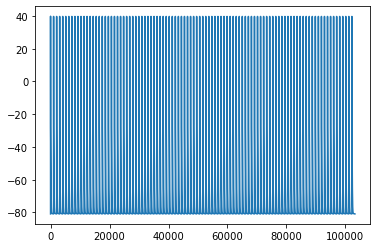

In [167]:
plt.plot(output.V)

(-10.0, 410.0)

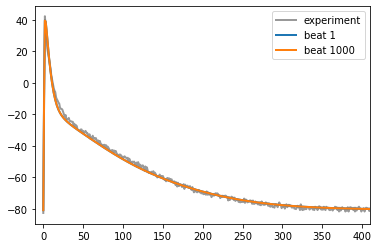

In [168]:
v = output_list[0]['config']['experimental_conditions']['1032']['phenotype'].V.values
plt.plot(v, color='0.6', lw=2, label='experiment')

plt.plot(output.V[:1032].values, lw=2, label='beat 1')
plt.plot(output.V[-1033:].values, lw=2, label='beat 1000')

plt.legend()
plt.xlim(-10, 410)

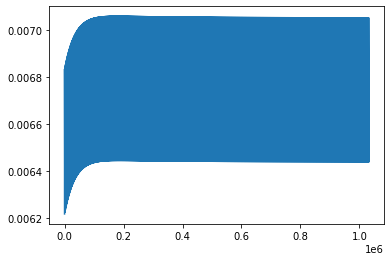

In [65]:
plt.plot(output.fluo_ss)

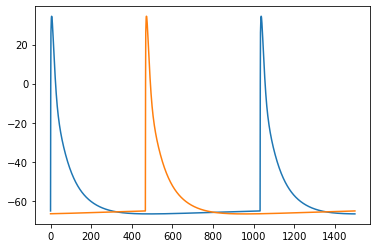

In [34]:
plt.plot(output.V[:1500].values)
plt.plot(output.V[-1500:].values)

In [169]:
# plt.plot(output.Na_i)
plt.plot(output.Nai[-1033:])

AttributeError: 'DataFrame' object has no attribute 'Nai'

In [171]:
plt.plot(output.Ki)

AttributeError: 'DataFrame' object has no attribute 'Ki'

In [37]:
# plt.plot(output.Ca_up)
# plt.plot(output.Ca_rel)

In [149]:
A = legend_algebraic.values.flatten()
R = np.zeros(len(legend_states))

#output = df.copy()
A_list = np.zeros((len(output), len(A)))

for i in range(len(output)):
    model.computeVariables(0, C.values, R, output.iloc[i].values, A)
    A_list[i] = A.copy()

In [153]:
A = pd.DataFrame(A_list, columns=legend_algebraic.index)

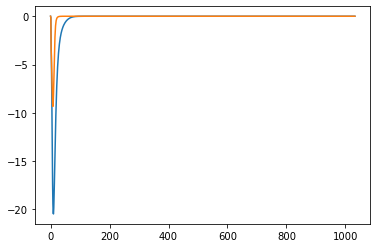

In [154]:
plt.plot(A.i_Ca_L)
plt.plot(A.ical_tor)

#plt.xlim(990, 1200)

In [207]:
#output.to_csv("../../../projects/Rheeda/G3C1/andrey_normal.csv", index=False)

In [208]:
tail = output[-1000 * 10 - 1:].reset_index()

In [209]:
tail

name,index,V,Na_c,Na_i,m,h1,h2,Ca_d,d_L,f_L1,...,O_C,O_TC,O_TMgC,O_TMgMg,O,Ca_rel,Ca_up,O_Calse,F1,F2
0,990000,-55.024745,140.021349,5.633908,0.032331,0.164876,0.158473,0.000055,0.000358,0.979689,...,0.009905,0.004740,0.154520,0.634265,1.375071,0.246570,0.247918,0.228319,0.522022,0.000090
1,990001,11.169576,140.017669,5.634408,0.986784,0.037737,0.134569,0.000143,0.097267,0.944823,...,0.009963,0.004763,0.154520,0.634270,1.375075,0.246578,0.248145,0.228323,0.522408,0.000091
2,990002,13.269086,140.016601,5.634553,0.992760,0.001347,0.096423,0.001218,0.417354,0.855242,...,0.010079,0.004812,0.154543,0.634258,1.375088,0.246587,0.248714,0.228328,0.522627,0.000256
3,990003,11.979645,140.016928,5.634508,0.991589,0.000049,0.069091,0.002852,0.620633,0.774190,...,0.010205,0.004867,0.154579,0.634236,1.375104,0.246059,0.249458,0.228294,0.520073,0.003156
4,990004,9.642786,140.017446,5.634438,0.988886,0.000003,0.049506,0.004627,0.744745,0.700956,...,0.011123,0.005244,0.154821,0.634135,1.375214,0.236759,0.253438,0.227148,0.510471,0.012895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,999996,-55.017970,140.020334,5.631853,0.032357,0.164676,0.158123,0.000055,0.000358,0.979657,...,0.009901,0.004738,0.154499,0.634280,1.375067,0.246396,0.247804,0.228193,0.520465,0.000090
9997,999997,-55.018539,140.020317,5.631856,0.032354,0.164697,0.158181,0.000055,0.000358,0.979662,...,0.009901,0.004737,0.154484,0.634291,1.375065,0.246401,0.247795,0.228197,0.520852,0.000090
9998,999998,-55.019102,140.020300,5.631858,0.032352,0.164717,0.158239,0.000055,0.000358,0.979666,...,0.009900,0.004737,0.154470,0.634302,1.375062,0.246407,0.247785,0.228202,0.521240,0.000090
9999,999999,-55.019658,140.020283,5.631860,0.032350,0.164738,0.158297,0.000055,0.000358,0.979671,...,0.009900,0.004737,0.154456,0.634313,1.375060,0.246412,0.247776,0.228206,0.521627,0.000090


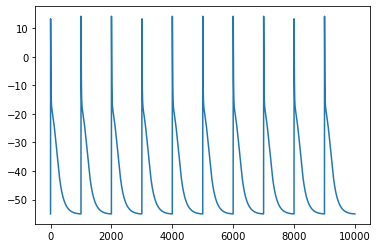

In [210]:
plt.plot(tail.V)

In [211]:
# tail.to_csv("../../../projects/Rheeda/G3C1/andrey_fibrosis.csv", index=False)

In [212]:
tail

name,index,V,Na_c,Na_i,m,h1,h2,Ca_d,d_L,f_L1,...,O_C,O_TC,O_TMgC,O_TMgMg,O,Ca_rel,Ca_up,O_Calse,F1,F2
0,990000,-55.024745,140.021349,5.633908,0.032331,0.164876,0.158473,0.000055,0.000358,0.979689,...,0.009905,0.004740,0.154520,0.634265,1.375071,0.246570,0.247918,0.228319,0.522022,0.000090
1,990001,11.169576,140.017669,5.634408,0.986784,0.037737,0.134569,0.000143,0.097267,0.944823,...,0.009963,0.004763,0.154520,0.634270,1.375075,0.246578,0.248145,0.228323,0.522408,0.000091
2,990002,13.269086,140.016601,5.634553,0.992760,0.001347,0.096423,0.001218,0.417354,0.855242,...,0.010079,0.004812,0.154543,0.634258,1.375088,0.246587,0.248714,0.228328,0.522627,0.000256
3,990003,11.979645,140.016928,5.634508,0.991589,0.000049,0.069091,0.002852,0.620633,0.774190,...,0.010205,0.004867,0.154579,0.634236,1.375104,0.246059,0.249458,0.228294,0.520073,0.003156
4,990004,9.642786,140.017446,5.634438,0.988886,0.000003,0.049506,0.004627,0.744745,0.700956,...,0.011123,0.005244,0.154821,0.634135,1.375214,0.236759,0.253438,0.227148,0.510471,0.012895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,999996,-55.017970,140.020334,5.631853,0.032357,0.164676,0.158123,0.000055,0.000358,0.979657,...,0.009901,0.004738,0.154499,0.634280,1.375067,0.246396,0.247804,0.228193,0.520465,0.000090
9997,999997,-55.018539,140.020317,5.631856,0.032354,0.164697,0.158181,0.000055,0.000358,0.979662,...,0.009901,0.004737,0.154484,0.634291,1.375065,0.246401,0.247795,0.228197,0.520852,0.000090
9998,999998,-55.019102,140.020300,5.631858,0.032352,0.164717,0.158239,0.000055,0.000358,0.979666,...,0.009900,0.004737,0.154470,0.634302,1.375062,0.246407,0.247785,0.228202,0.521240,0.000090
9999,999999,-55.019658,140.020283,5.631860,0.032350,0.164738,0.158297,0.000055,0.000358,0.979671,...,0.009900,0.004737,0.154456,0.634313,1.375060,0.246412,0.247776,0.228206,0.521627,0.000090


In [68]:
err_abs = output.iloc[-1] - output.iloc[0]
err_rel = err_abs / output.iloc[0] * 100

In [69]:
items = ['Na_i', 'K_i', 'V', 'Ca_i']
items = ['Nai', 'Ki']

df_err= pd.DataFrame([err_rel[items], err_abs[items]],
                     index=['err_rel', 'err_abs'])
df_err

name,Nai,Ki
err_rel,-2.897961,0.111424
err_abs,-0.153090,0.130707


# 3D

spherical stimulus of radius 0.75mm

stimulus[0].strength     = 3e2 units: uA/cm^3(3D current)

stimulus[0].duration     = 5 [ms]

$(100 um)^3 \cdot 300 uA / cm^3 = (10^2 \cdot 10^{-6} m)^3 \cdot 3 \cdot 10^{-4} \cdot 10^6 A/m^{-3} = 10^{-12} m^3 \cdot 3 \cdot 10^2 A / m^3 = 3 \cdot 10^{-10} A = 0.3 nA$

Cm = 0.05 nF

In [141]:
model.computeRates.argtypes = [
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]
model.computeRates.restype = ctypes.c_void_p

In [142]:
def calculate_diffusion(V, g_gap_junc_tensor):
        
    I = np.zeros_like(V)
        
    for axis in range(V.ndim):

        indices_next, indices_prev = [slice(None)] * 3, [slice(None)] * 3
        indices_next[axis] = slice(1, None)        
        indices_prev[axis] = slice(0, -1)
        indices_next = tuple(indices_next)
        indices_prev = tuple(indices_prev)

        I[indices_next] = I[indices_next] - g_gap_junc_tensor[axis] * (V[indices_prev] - V[indices_next])
        I[indices_prev] = I[indices_prev] - g_gap_junc_tensor[axis] * (V[indices_next] - V[indices_prev])
            
    return I


def is_pacing_condition(t, ix, iy, iz, SIZE, stim_size):
    
    X_SIZE, Y_SIZE, Z_SIZE = SIZE

    pacing_condition =  (X_SIZE / 2 - stim_size / 2 <= ix <= X_SIZE / 2 + stim_size / 2)
    pacing_condition &= (Y_SIZE / 2 - stim_size / 2 <= iy <= Y_SIZE / 2 + stim_size / 2)
    pacing_condition &= (iz == 0)

    pacing_condition &= t < 5e-3
    
    return pacing_condition


def is_pacing_condition_sphere(t, ix, iy, iz, SIZE, R):
    
    X_SIZE, Y_SIZE, Z_SIZE = SIZE
    
    x_center, y_center, z_center = X_SIZE / 2, Y_SIZE / 2, 0

    pacing_condition =  (ix - x_center)**2 + (iy - y_center)**2 + (iz - z_center)**2 < R**2
    pacing_condition &= t < 5e-3
    
    return pacing_condition

In [145]:
dt = 2e-5

t_end = 2e-2
t_sampling = 1e-4

sigma_l = 0.126  # S/m
h = 100  # um

g_gap_junc = sigma_l * h # 5.0
g_gap_junc_tensor = [g_gap_junc,
                     g_gap_junc / 5,
                     g_gap_junc / 5]

N = int(t_end / dt)
step_print = int(t_sampling / dt)


X_SIZE, Y_SIZE, Z_SIZE = 61, 41, 21

#X_SIZE, Y_SIZE, Z_SIZE = 101, 1, 1

SIZE = X_SIZE, Y_SIZE, Z_SIZE

C, S = create_C_S(dict(genes=genes, state=state), config, '1032')

A = np.zeros(70)
R = np.zeros_like(S)

S_tissue = np.tile(S.values, (*SIZE, 1))
C_tissue = np.tile(C.values, (*SIZE, 1))
C_tissue[:, :, :, 7] = 0
R_tissue = np.zeros_like(S_tissue)
A_tissue = np.tile(A, (*SIZE, 1))

result = np.zeros((*SIZE, int(t_end / t_sampling)))
i_print = 0
t = 0

stim_size = 1 # 10

stim_amplitude -60
stim_duration 0.001
Mg_i 1.0
Na_b 140
Ca_b 2.0
K_b 4
stim_period 1.032


In [146]:
IS_PARALLEL = False

for it in tqdm(range(N)):
    
    if it % step_print == 0:
        result[:, :, :, i_print] = S_tissue[:, :, :, 0]
        i_print += 1
        
    if IS_PARALLEL:

        C_tissue[X_SIZE / 2 - stim_size / 2: X_SIZE / 2 + stim_size / 2,
                 Y_SIZE / 2 - stim_size / 2: Y_SIZE / 2 + stim_size / 2,
                 0, 7] = -300 if t < 5e-3 else 0 

        args = zip([t] * (X_SIZE * Y_SIZE * Z_SIZE),
                   C_tissue.reshape(-1, C_tissue.shape[-1]),
                   R_tissue.reshape(-1, R_tissue.shape[-1]),
                   S_tissue.reshape(-1, S_tissue.shape[-1]),
                   A_tissue.reshape(-1, A_tissue.shape[-1]))

        with Pool(2) as p:
            R_list = p.map(f, args)

        R_tissue = np.array(R_list).reshape(R_tissue.shape)
        
    else:

        for ix in range(X_SIZE):
            for iy in range(Y_SIZE):
                for iz in range(Z_SIZE):

                    stim_amplitude = -120 # -10 / 0.05 # -0.3 / 0.05
                    #C['stim_amplitude'] = stim_amplitude if is_pacing_condition(t, ix, iy, iz, SIZE, stim_size) else 0
                    C['stim_amplitude'] = stim_amplitude if is_pacing_condition_sphere(t, ix, iy, iz, SIZE, R=7.5) else 0
                    #C['stim_amplitude'] = stim_amplitude if ix == 0 and t < 5e-3 else 0

                    model.computeRates(t,
                                       C.values,
                                       R_tissue[ix, iy, iz],
                                       S_tissue[ix, iy, iz],
                                       A.copy())

    V = S_tissue[:, :, :, 0]
    assert not np.any(np.isnan(V))
    I_gap_junc = calculate_diffusion(V, g_gap_junc_tensor)
    
    R_tissue[:, :, :, 0] = R_tissue[:, :, :, 0] - I_gap_junc * 1000
    
    S_tissue = S_tissue + dt * R_tissue            
    t += dt

  0%|          | 0/999 [00:00<?, ?it/s]

In [147]:
ixc, iyc, izc = map(lambda x: int(x // 2), SIZE)
ic = ixc, iyc, izc

In [148]:
plt.plot(result[ixc, iyc, 0], '.-')
plt.plot(result[ic], '.-')
plt.plot(result[ixc, iyc, -1], '.-')

In [133]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [149]:
plt.plot(result[0, 0, 0], '.-')
plt.plot(result[-10, 0, 0], '.-')
plt.plot(result[-3, 0, 0], '.-')
#plt.plot(result[-10, 0, 0], '.-')

IndexError: index 60 is out of bounds for axis 3 with size 20

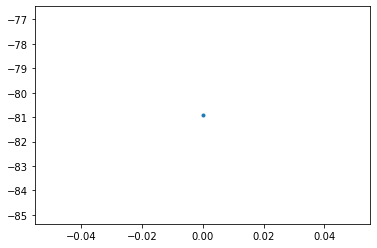

In [96]:
plt.plot(result[ixc, iyc, :, 0], '.-')
plt.plot(result[ixc, iyc, :, 60], '.-')

In [83]:
a = result[:, 0, 0, :]

In [84]:
ax = np.diff(result[:, iyc, izc, :], axis=-1)
ay = np.diff(result[ixc, :, izc, :], axis=-1)
az = np.diff(result[ixc, iyc, :, :], axis=-1)

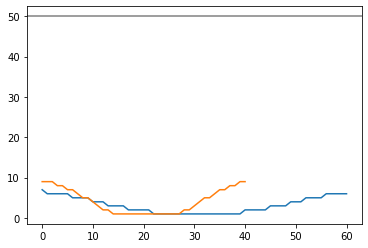

In [85]:
plt.plot(np.argmax(ax, axis=1))
plt.plot(np.argmax(ay, axis=1))
plt.plot(np.argmax(az, axis=1))

plt.axhline(50, color='0.5')

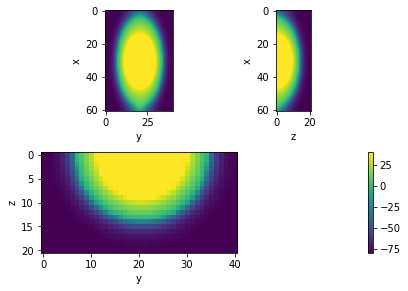

In [116]:
fig, axes = plt.subplots(2, 2,
                        #sharex='col', sharey='row',
                        )

t = 60

axes[0, 0].imshow(result[:, :, 0, t],
           vmin=-80, vmax=40,
           #aspect=10,
          )
axes[0, 0].set_xlabel('y')
axes[0, 0].set_ylabel('x')

axes[0, 1].imshow(result[:, iyc, :, t],
           vmin=-80, vmax=40,
           #aspect=10,
          )

axes[0, 1].set_xlabel('z')
axes[0, 1].set_ylabel('x')

im = axes[1, 0].imshow(result[ixc, :, :, t].T,
           vmin=-80, vmax=40,
           #aspect=10,
          )

axes[1, 0].set_xlabel('y')
axes[1, 0].set_ylabel('z')

axes[1, 1].set_visible(False)

plt.colorbar(im)

plt.tight_layout()

# Euler

In [34]:
dt = 3.5e-5

t_end = 1.
t_sampling = 1e-3

N = int(t_end / dt)
step_print = int(t_sampling / dt)

C, S = create_C_S(dict(genes=genes, state=state), config, '1032')

A = np.zeros(70)
R = np.zeros_like(S)

result = []
i_print = 0
t = 0

for it in tqdm(range(N)):
    
    if it % step_print == 0:
        result.append(S)
        i_print += 1
    
    C['stim_amplitude'] = -60 if t <= 1e-3 else 0

    model.computeRates(t,
                       C.values,
                       R,
                       S.values,
                       A.copy())
    
    assert not S.isna().any()

    S = S + dt * R           
    t += dt

stim_amplitude -60
stim_duration 0.001
Mg_i 1.0
Na_b 140
Ca_b 2.0
K_b 4
stim_period 1.032


  0%|          | 0/28571 [00:00<?, ?it/s]

In [35]:
result = pd.concat(result, axis=1).T
result.reset_index(inplace=True)

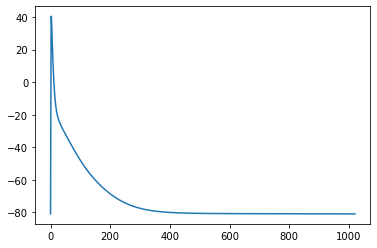

In [36]:
plt.plot(result.V)

# Profiling

In [23]:
# l = []
# for i in range(128):
#     df = pd.read_csv(os.path.join(config_path, f"mpi/report_{i:04d}.csv")).iloc[1:]
#     df['rank'] = i
#     l.append(df)
    
# df = pd.concat(l)
# #df.set_index('rank', append=True, inplace=True)

In [24]:
# sns.barplot(y='gather_allgather', data=df, x='rank', palette="Blues")
# #sns.barplot(y='calc', data=df, x='rank', palette="Reds")